In [5]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
file_path = 'time_added_logs/merged_eq_assigned.xlsx'
df = pd.read_excel(file_path)

# Define the North and South directions
North_directions = ['North', 'NorthEast', 'NorthWest']
South_directions = ['SouthEast', 'South', 'SouthWest']
objects = [3]
df2 = df[df['EQ_FACTOR'].isin(objects)]
print(df2)
df = df2
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Define the time intervals (adjust as needed)
time_intervals = [
    ('09:23:50', '09:28:49'),
    ('09:38:50', '09:43:49'),
    ('09:53:50', '09:58:49'),
    ('10:08:50', '10:13:49'),
    ('10:23:50', '10:28:49'),
    ('10:38:50', '10:43:49'),
    ('10:53:50', '10:58:49'),
    ('11:08:50', '11:13:49'),
    ('11:23:50', '11:28:49')
]

# Initialize dictionaries to store counts for each direction and time interval
North_counts = {}
South_counts = {}

# Count occurrences for North and South directions within each time interval
for start, end in time_intervals:
    # Filter DataFrame for each time interval
    interval_df = df[(df['Time'].dt.time >= pd.to_datetime(start).time()) &
                     (df['Time'].dt.time < pd.to_datetime(end).time())]
    
    print(interval_df)
    # Count occurrences for North directions
    North_count = interval_df[interval_df['Direction'].isin(North_directions)]['Direction'].count()
    North_counts[f'{start}-{end}'] = North_count

    # Count occurrences for South directions
    South_count = interval_df[interval_df['Direction'].isin(South_directions)]['Direction'].count()
    South_counts[f'{start}-{end}'] = South_count


# Print the counts for each direction and time interval
print("Counts for North directions (Away from camera):")
for interval, count in North_counts.items():
    print(f"Count of North directions between {interval}: {count}")

total = 0
print("\nCounts for South directions (Towards Camera):")
for interval, count in South_counts.items():
    total+=count
    print(f"Count of South directions between {interval}: {count}")

print(f'Total count: {total}')


       FrameNumber  ObjectID ObjectType  Direction     Seconds      Time  \
60             844         7      truck  SouthWest   28.133333  09:24:17   
154           2643         7      truck  NorthEast   88.100000  09:25:17   
155           2644         7      truck  SouthEast   88.133333  09:25:17   
156           2654         7      truck  NorthEast   88.466667  09:25:17   
177           2763         7      truck  NorthEast   92.100000  09:25:21   
...            ...       ...        ...        ...         ...       ...   
13583         7062         7      truck  SouthEast  456.791721  11:31:25   
13587         7082         7      truck  SouthWest  458.085382  11:31:27   
13598         7141         7      truck  NorthEast  461.901682  11:31:30   
13626         8027         5        bus  SouthEast  519.210867  11:32:28   
13640         8521         7      truck  NorthWest  551.164295  11:33:00   

       EQ_FACTOR  
60           3.0  
154          3.0  
155          3.0  
156        

/var/folders/d2/vfvjx2nn47d77zlp4l9ql4_40000gn/T/ipykernel_65477/1681052145.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


5236


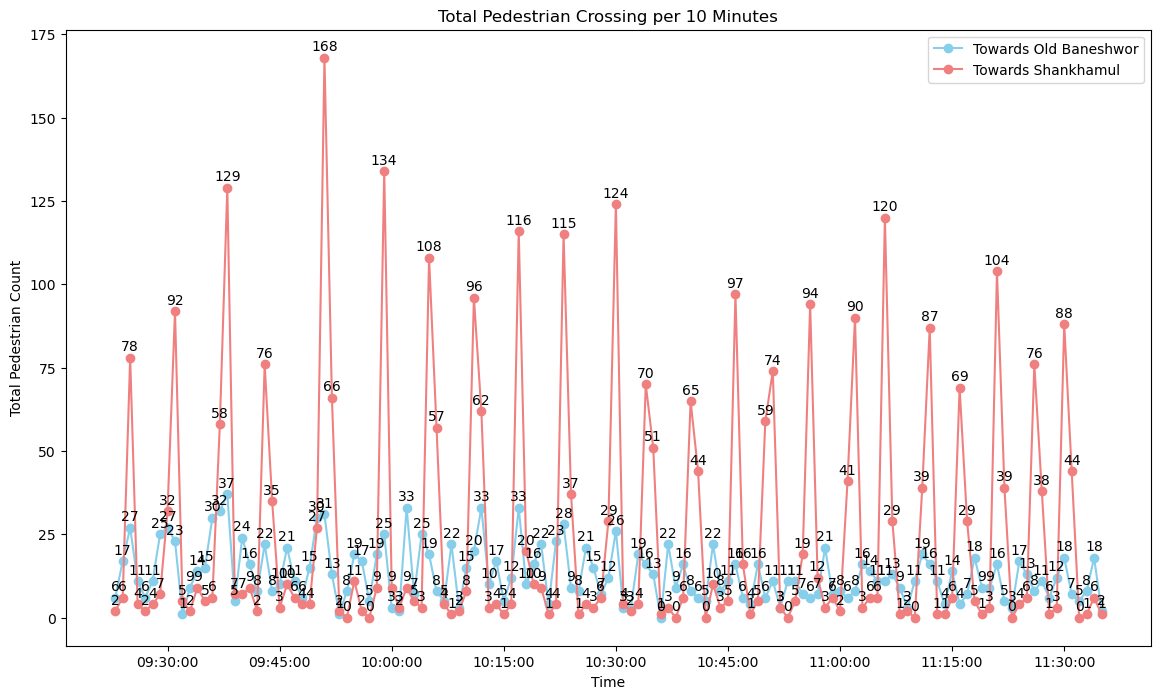

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = 'time_added_logs/merged_eq_assigned.xlsx'
df = pd.read_excel(file_path)

objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Filter the DataFrame to include only 'North' directions
North_directions = ['North', 'NorthEast', 'NorthWest']
df_north = df[df['Direction'].isin(North_directions)]

# Filter the DataFrame to include only 'South' directions
South_directions = ['SouthEast', 'South', 'SouthWest', 'East', 'West']
df_south = df[df['Direction'].isin(South_directions)]

# Group by Time and count the number of entries for 'North' and 'South' at 1-minute intervals
grouped_north = df_north.groupby(pd.Grouper(key='Time', freq='1T')).size().reset_index(name='North_Total_Count')
grouped_south = df_south.groupby(pd.Grouper(key='Time', freq='1T')).size().reset_index(name='South_Total_Count')

# Merge the two DataFrames on Time
merged_data = pd.merge(grouped_north, grouped_south, on='Time', how='outer').fillna(0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 8))

# Line chart for North_Total_Count
ax.plot(merged_data['Time'], merged_data['North_Total_Count'], label='Towards Old Baneshwor', marker='o', linestyle='-', color='skyblue')

# Line chart for South_Total_Count
ax.plot(merged_data['Time'], merged_data['South_Total_Count'], label='Towards Shankhamul', marker='o', linestyle='-', color='lightcoral')

ax.set_xlabel('Time')
ax.set_ylabel('Total Pedestrian Count')
ax.set_title('Total Pedestrian Crossing per 10 Minutes')
ax.legend()

# Format the x-axis to show only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Display the numeric values on the line chart
for i, (north_value, south_value) in enumerate(zip(merged_data['North_Total_Count'], merged_data['South_Total_Count'])):
    ax.annotate(f'{int(north_value)}', (merged_data['Time'].iloc[i], north_value), textcoords="offset points", xytext=(0, 5), ha='center')
    ax.annotate(f'{int(south_value)}', (merged_data['Time'].iloc[i], south_value), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()


6829


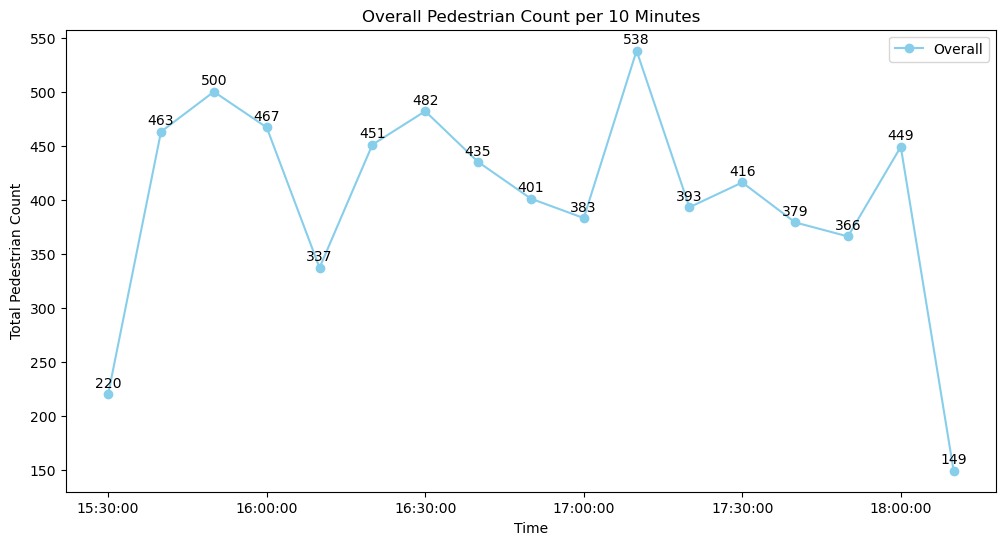

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = 'time_added_logs/merged_log.xlsx'
df = pd.read_excel(file_path)
objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Group by Time and count the total number of entries at 10-minute intervals
grouped_data = df.groupby(pd.Grouper(key='Time', freq='10T')).size().reset_index(name='Total_Count')

# Plot the line chart
fig, ax = plt.subplots(figsize=(12, 6))

# Line chart for Total_Count
ax.plot(grouped_data['Time'], grouped_data['Total_Count'], label='Overall', marker='o', linestyle='-', color='skyblue')

ax.set_xlabel('Time')
ax.set_ylabel('Total Pedestrian Count')
ax.set_title('Overall Pedestrian Count per 10 Minutes')
ax.legend()

# Format the x-axis to show only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Display the numeric values on the line chart
for i, total_count in enumerate(grouped_data['Total_Count']):
    ax.annotate(f'{int(total_count)}', (grouped_data['Time'].iloc[i], total_count), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()


6829


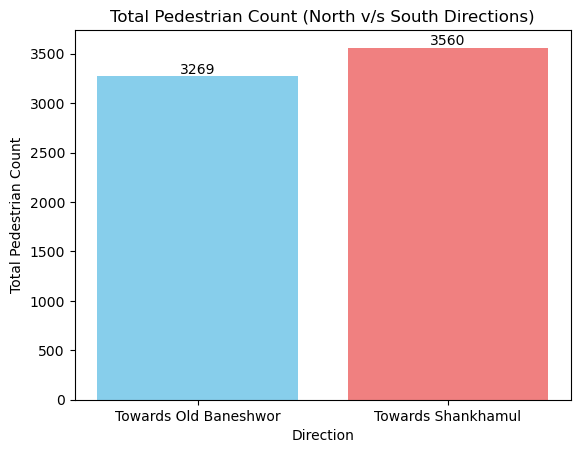

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'time_added_logs/merged_log.xlsx'
df = pd.read_excel(file_path)

objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
# Define the North and South directions
North_directions = ['North', 'NorthEast', 'NorthWest']
South_directions = ['SouthEast', 'South', 'SouthWest', 'East', 'West']

# Filter the DataFrame to include only 'North' directions
df_north = df[df['Direction'].isin(North_directions)]

# Filter the DataFrame to include only 'South' directions
df_south = df[df['Direction'].isin(South_directions)]

# Calculate total counts for North and South directions
total_north = df_north.shape[0]
total_south = df_south.shape[0]

# Create a bar graph
plt.bar(['Towards Old Baneshwor', 'Towards Shankhamul'], [total_north, total_south], color=['skyblue', 'lightcoral'])

# Add numeric values on top of the bars
for i, count in enumerate([total_north, total_south]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Labeling the plot
plt.xlabel('Direction')
plt.ylabel('Total Pedestrian Count')
plt.title('Total Pedestrian Count (North v/s South Directions)')

# Show the plot
plt.show()


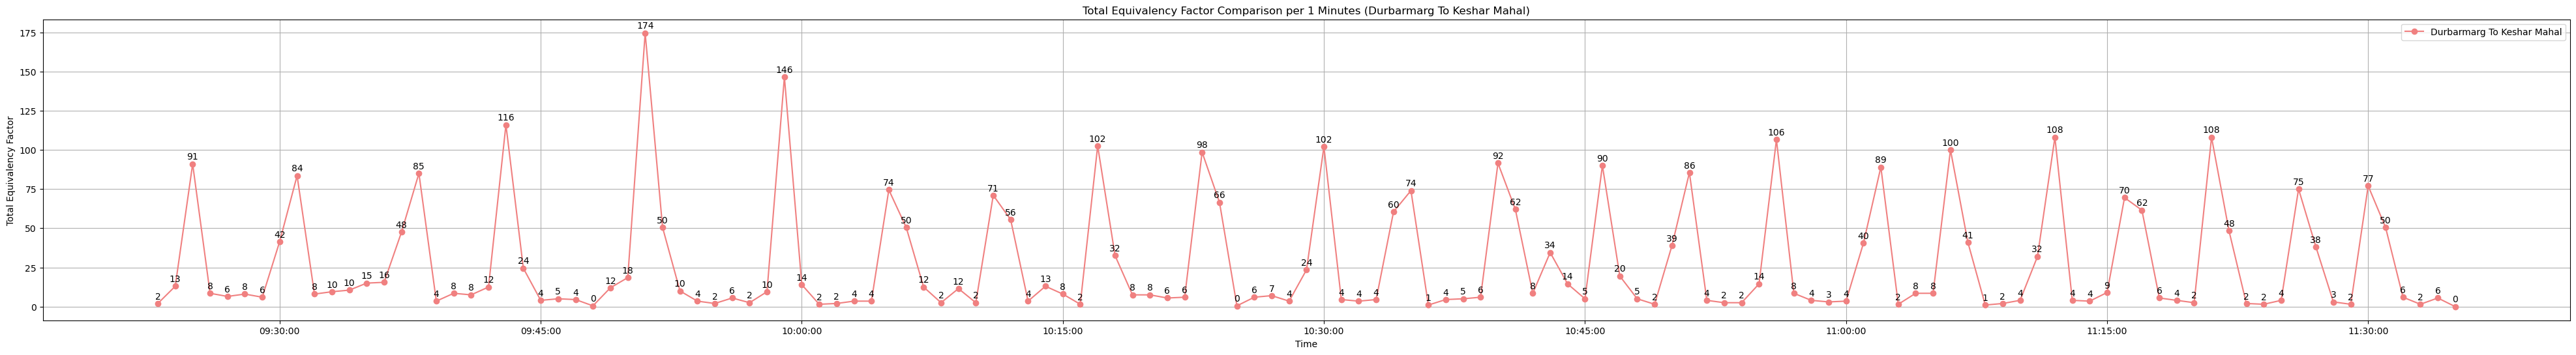

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = 'time_added_logs/merged_eq_assigned.xlsx'
df = pd.read_excel(file_path)

# Define equivalency factors
equivalency_factors = {'motorcycle': 0.5, 'bicycle': 0.5, 'car': 1, 'truck': 3.0, 'bus': 3.0}

# Add a new column 'EquivalencyFactor' based on the ObjectType
df['EquivalencyFactor'] = df['ObjectType'].map(equivalency_factors)

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Filter the DataFrame to include only 'South' directions
South_directions = ['SouthEast', 'South', 'SouthWest']
df_south = df[df['Direction'].isin(South_directions)]

# Group by Time and calculate the total equivalency factor for 'South' at 1-minute intervals
grouped_south = df_south.groupby(pd.Grouper(key='Time', freq='1T'))['EquivalencyFactor'].sum().reset_index(name='South_Total_Equivalency')

# Plot the line chart for 'South'
fig, ax = plt.subplots(figsize=(50, 6))
ax.plot(grouped_south['Time'], grouped_south['South_Total_Equivalency'], label='Durbarmarg To Keshar Mahal', marker='o', linestyle='-', color='lightcoral')

ax.set_xlabel('Time')
ax.set_ylabel('Total Equivalency Factor')
ax.set_title('Total Equivalency Factor Comparison per 1 Minutes (Durbarmarg To Keshar Mahal)')
ax.legend()

# Format the x-axis to show only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Display the numeric values on the line graph
for i, value in enumerate(grouped_south['South_Total_Equivalency']):
    ax.annotate(f'{value:.0f}', (grouped_south['Time'].iloc[i], value), textcoords="offset points", xytext=(0, 5), ha='center')

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()


In [6]:
# Group by EquivalencyFactor and count occurrences
equivalency_factor_counts = df_south.groupby('EquivalencyFactor').size()

# Print the total count of each EquivalencyFactor
print("Total count of each EquivalencyFactor:")
print(equivalency_factor_counts)


Total count of each EquivalencyFactor:
EquivalencyFactor
0.5    2764
1.0    1209
3.0     356
dtype: int64
